# QMSS5074GR - Final Project (3rd)


### Your Grp ID: G_6
### Your UNIs: tz2656, ac5631, lz2990
### Your Full Names: Tiantian Zhao, Ao Chan, Longjie Zhang
### Public GitHub Repo: [Fill Here]

## Description

## Part 1 – Data Ingestion & Preprocessing

1. **Data Loading**  
   - Acquire the Stanford Sentiment Treebank dataset.  
   - Split into training, validation and test sets with stratified sampling to preserve class balance.  
   - Clearly document your splitting strategy and resulting dataset sizes.

2. **Text Cleaning & Tokenization**  
   - Implement a reusable preprocessing pipeline that handles at least:  
     - HTML removal, lowercasing, punctuation stripping  
     - Vocabulary pruning (e.g., rare words threshold)  
     - Tokenization (character- or word-level)  
   - Expose this as a function/class so it can be saved and re-loaded for inference.

3. **Feature Extraction**  
   - **Traditional**: Build a TF-IDF vectorizer (or n-gram count) pipeline.  
   - **Neural**: Prepare sequences for embedding—pad/truncate to a fixed length.  
   - Save each preprocessor (vectorizer/tokenizer) to disk.

---

## Part 2 – Exploratory Data Analysis (EDA)

1. **Class Distribution**  
   - Visualize the number of positive vs. negative reviews.  
   - Compute descriptive statistics on review lengths (mean, median, IQR).  

2. **Text Characteristics**  
   - Plot the 20 most frequent tokens per sentiment class.  
   - Generate word clouds (or bar charts) highlighting key terms for each class.  

3. **Correlation Analysis**  
   - Analyze whether review length correlates with sentiment.  
   - Present findings numerically and with at least one visualization.

---

## Part 3 – Baseline Traditional Models

1. **Logistic Regression & SVM**  
   - Train at least two linear models on your TF-IDF features (e.g., logistic regression, linear SVM).  
   - Use cross-validation (≥ 5 folds) on the training set to tune at least one hyperparameter.  

2. **Random Forest & Gradient Boosting**  
   - Train two tree-based models (e.g., Random Forest, XGBoost) on the same features.  
   - Report feature-importance for each and discuss any notable tokens.

3. **Evaluation Metrics**  
   - Compute accuracy, precision, recall, F1-score, and ROC-AUC on the **held-out test set**.  
   - Present all results in a single comparison table.

---

## Part 4 – Neural Network Models

1. **Simple Feed-Forward**  
   - Build an embedding layer + a dense MLP classifier.  
   - Ensure you freeze vs. unfreeze embeddings in separate runs.

2. **Convolutional Text Classifier**  
   - Implement a 1D-CNN architecture (Conv + Pooling) for sequence data.  
   - Justify your choice of kernel sizes and number of filters.

3. **Recurrent Model (Optional)**  
   - (Stretch) Add an RNN or Bi-LSTM layer and compare performance/time vs. CNN.

---

## Part 5 – Transfer Learning & Advanced Architectures

1. **Pre-trained Embeddings**  
   - Retrain one network using pre-trained GloVe (or FastText) embeddings.  
   - Compare results against your from-scratch embedding runs.

2. **Transformer Fine-Tuning**  
   - Fine-tune a BERT-family model on the training data.  
   - Clearly outline your training hyperparameters (learning rate, batch size, epochs).


---

## Part 6 – Hyperparameter Optimization

1. **Search Strategy**  
   - Use a library (e.g., Keras Tuner, Optuna) to optimize at least two hyperparameters of one deep model.  
   - Describe your search space and stopping criteria.

2. **Results Analysis**  
   - Report the best hyperparameter configuration found.  
   - Plot validation-loss (or metric) vs. trials to illustrate tuning behavior.

---

## Part 7 – Final Comparison & Error Analysis

1. **Consolidated Results**  
   - Tabulate test-set performance for **all** models (traditional, neural, transfer-learned).  
   - Highlight top‐performing model overall and top in each category.

2. **Statistical Significance**  
   - Perform a significance test (e.g., McNemar’s test) between your best two models.  

3. **Error Analysis**  
   - Identify at least 20 examples your best model misclassified.  
   - For a sample of 5, provide the raw text, predicted vs. true label, and a short discussion of each error—what linguistic artifact might have confused the model?

---

## Part 8 – Optional Challenge Extensions

- Implement data augmentation for text (back-translation, synonym swapping) and measure its impact.  
- Integrate a sentiment lexicon feature (e.g., VADER scores) into your models and assess whether it improves predictions.  
- Deploy your best model as a simple REST API using Flask or FastAPI and demo it on a handful of user‐submitted reviews.

---

## Start coding .....

ps. the code below is just an filler code with some tips on the top it.


But the main project requirements are listed above in the description.

## Part 1 – Data Ingestion & Preprocessing


1. **Data Loading**  
    - Acquire the Stanford Sentiment Treebank dataset.
    - Split into training, validation, and test sets with stratified sampling to preserve class balance.
    - Clearly document your splitting strategy and resulting dataset sizes.
    

In [1]:
# Load data (example)
import pandas as pd


# IMPORT DATA
!git clone https://github.com/YJiangcm/SST-2-sentiment-analysis.git


Cloning into 'SST-2-sentiment-analysis'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 85 (delta 44), reused 29 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (85/85), 478.79 KiB | 7.98 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [2]:
# 设置文件路径
train_path = "SST-2-sentiment-analysis/data/train.tsv"
val_path = "SST-2-sentiment-analysis/data/dev.tsv"
test_path = "SST-2-sentiment-analysis/data/test.tsv"

# 加载数据集（无表头，因此 header=None，手动命名列）
df_train = pd.read_csv(train_path, sep='\t', header=None, names=['label', 'text'])
df_val = pd.read_csv(val_path, sep='\t', header=None, names=['label', 'text'])
df_test = pd.read_csv(test_path, sep='\t', header=None, names=['label', 'text'])

# 查看数据结构
print("Train set:")
display(df_train.head())

print("Validation set:")
display(df_val.head())

print("Test set:")
display(df_test.head())

Train set:


,label,text
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...


Validation set:


,label,text
0,0,one long string of cliches .
1,0,if you 've ever entertained the notion of doin...
2,0,k-19 exploits our substantial collective fear ...
3,0,it 's played in the most straight-faced fashio...
4,1,"there is a fabric of complex ideas here , and ..."


Test set:


,label,text
0,0,"no movement , no yuks , not much of anything ."
1,0,"a gob of drivel so sickly sweet , even the eag..."
2,0,"gangs of new york is an unapologetic mess , wh..."
3,0,"we never really feel involved with the story ,..."
4,1,this is one of polanski 's best films .



2. **Text Cleaning & Tokenization**  
    - Implement a reusable preprocessing pipeline that handles at least:  
        - HTML removal, lowercasing, punctuation stripping  
        - Vocabulary pruning (e.g., rare words threshold)  
        - Tokenization (character- or word-level)  
    - Expose this as a function/class so it can be saved and re-loaded for inference.
    

In [3]:
import re
from sklearn.feature_extraction.text import CountVectorizer

# 清洗函数
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)                  # 去除HTML标签
    text = re.sub(r'\W+', ' ', text.lower())             # 转小写 + 去除非字母数字
    return text.strip()

# 对所有数据集进行清洗
for df in [df_train, df_val, df_test]:
    df['cleaned_text'] = df['text'].apply(clean_text)

# 检查清洗结果
print("Train cleaned:")
display(df_train[['text', 'cleaned_text']].head())

print("Validation cleaned:")
display(df_val[['text', 'cleaned_text']].head())

print("Test cleaned:")
display(df_test[['text', 'cleaned_text']].head())


Train cleaned:


,text,cleaned_text
0,"a stirring , funny and finally transporting re...",a stirring funny and finally transporting re i...
1,apparently reassembled from the cutting-room f...,apparently reassembled from the cutting room f...
2,they presume their audience wo n't sit still f...,they presume their audience wo n t sit still f...
3,this is a visually stunning rumination on love...,this is a visually stunning rumination on love...
4,jonathan parker 's bartleby should have been t...,jonathan parker s bartleby should have been th...


Validation cleaned:


,text,cleaned_text
0,one long string of cliches .,one long string of cliches
1,if you 've ever entertained the notion of doin...,if you ve ever entertained the notion of doing...
2,k-19 exploits our substantial collective fear ...,k 19 exploits our substantial collective fear ...
3,it 's played in the most straight-faced fashio...,it s played in the most straight faced fashion...
4,"there is a fabric of complex ideas here , and ...",there is a fabric of complex ideas here and fe...


Test cleaned:


,text,cleaned_text
0,"no movement , no yuks , not much of anything .",no movement no yuks not much of anything
1,"a gob of drivel so sickly sweet , even the eag...",a gob of drivel so sickly sweet even the eager...
2,"gangs of new york is an unapologetic mess , wh...",gangs of new york is an unapologetic mess whos...
3,"we never really feel involved with the story ,...",we never really feel involved with the story a...
4,this is one of polanski 's best films .,this is one of polanski s best films



3. **Feature Extraction**  
    - **Traditional**: Build a TF-IDF vectorizer (or n-gram count) pipeline.  
    - **Neural**: Prepare sequences for embedding—pad/truncate to a fixed length.  
    - Save each preprocessor (vectorizer/tokenizer) to disk.
    

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['cleaned_text'])

X_val_tfidf = tfidf_vectorizer.transform(df_val['cleaned_text'])
X_test_tfidf = tfidf_vectorizer.transform(df_test['cleaned_text'])

y_train = df_train['label'].values
y_val = df_val['label'].values
y_test = df_test['label'].values

print("Train TF-IDF shape:", X_train_tfidf.shape)
print("Validation TF-IDF shape:", X_val_tfidf.shape)
print("Test TF-IDF shape:", X_test_tfidf.shape)


Train TF-IDF shape: (6920, 5000)
Validation TF-IDF shape: (872, 5000)
Test TF-IDF shape: (1821, 5000)


## Part 2 – Exploratory Data Analysis (EDA)


1. **Class Distribution**  
    - Visualize the number of positive vs. negative reviews.  
    - Compute descriptive statistics on review lengths (mean, median, IQR).
    

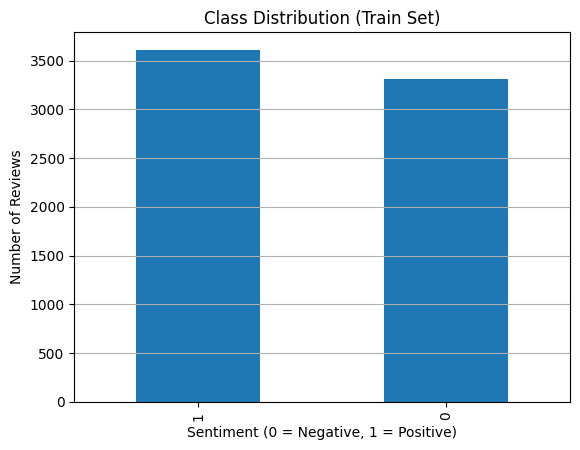

Mean review length: 17.57
Median review length: 17.0
IQR (Interquartile Range): 13.0


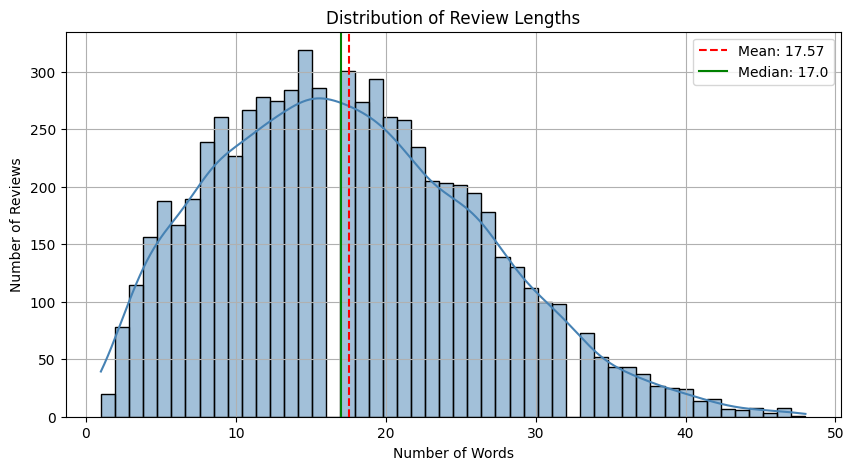

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 可视化正负类数量分布
df_train['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution (Train Set)")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Number of Reviews")
plt.grid(axis='y')
plt.show()

# 统计评论长度（以词计）
df_train['review_len'] = df_train['cleaned_text'].apply(lambda x: len(x.split()))

# 打印描述性统计量
mean_len = df_train['review_len'].mean()
median_len = df_train['review_len'].median()
q1 = np.percentile(df_train['review_len'], 25)
q3 = np.percentile(df_train['review_len'], 75)
iqr = q3 - q1

print(f"Mean review length: {mean_len:.2f}")
print(f"Median review length: {median_len}")
print(f"IQR (Interquartile Range): {iqr}")

# 长度分布图
plt.figure(figsize=(10, 5))
sns.histplot(df_train['review_len'], bins=50, kde=True, color='steelblue')
plt.axvline(mean_len, color='red', linestyle='--', label=f'Mean: {mean_len:.2f}')
plt.axvline(median_len, color='green', linestyle='-', label=f'Median: {median_len}')
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.legend()
plt.grid(True)
plt.show()


## Part 3 – Baseline Traditional Models


1. **Logistic Regression & SVM**  
    - Train at least two linear models on your TF-IDF features.  
    - Use cross-validation (≥ 5 folds) on the training set to tune at least one hyperparameter.
    

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg_scores = cross_val_score(logreg, X_train_tfidf, y_train, cv=5)

svm = SVC(kernel='linear', random_state=42)
svm_scores = cross_val_score(svm, X_train_tfidf, y_train, cv=5)


print("Logistic Regression CV Scores:", logreg_scores)
print("SVM CV Scores:", svm_scores)


Logistic Regression CV Scores: [0.79046243 0.76806358 0.78612717 0.76950867 0.7882948 ]
SVM CV Scores: [0.7882948  0.7666185  0.78251445 0.77745665 0.79118497]


2.

<ipython-input-7-6c86bd4d813e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_top20.values, y=rf_top20.index, palette="Blues_d")


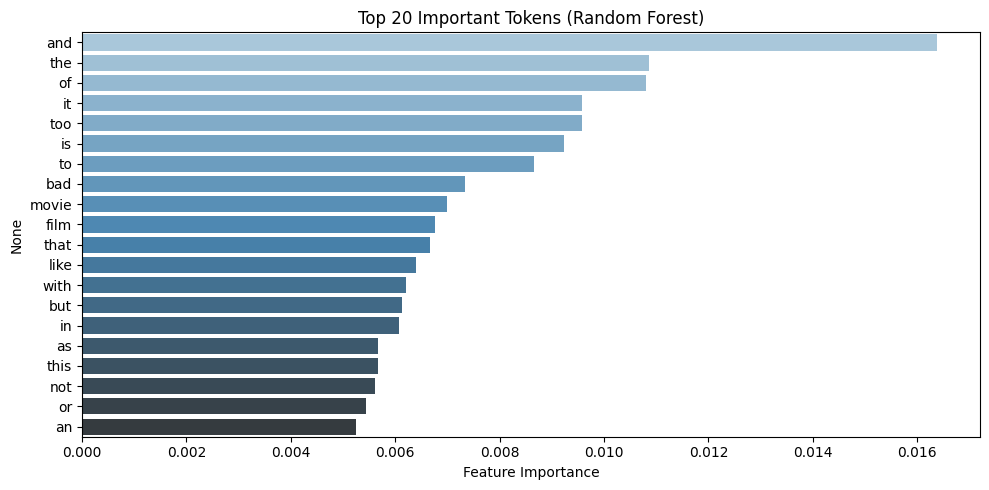

In [7]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = tfidf_vectorizer.get_feature_names_out()

# ------------------
# Random Forest 模型
# ------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)

rf_importance = pd.Series(rf.feature_importances_, index=feature_names)
rf_top20 = rf_importance.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 5))
sns.barplot(x=rf_top20.values, y=rf_top20.index, palette="Blues_d")
plt.title("Top 20 Important Tokens (Random Forest)")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:50:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-8-5287dafd0bd6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_top20.values, y=xgb_top20.index, palette="Oranges_d")


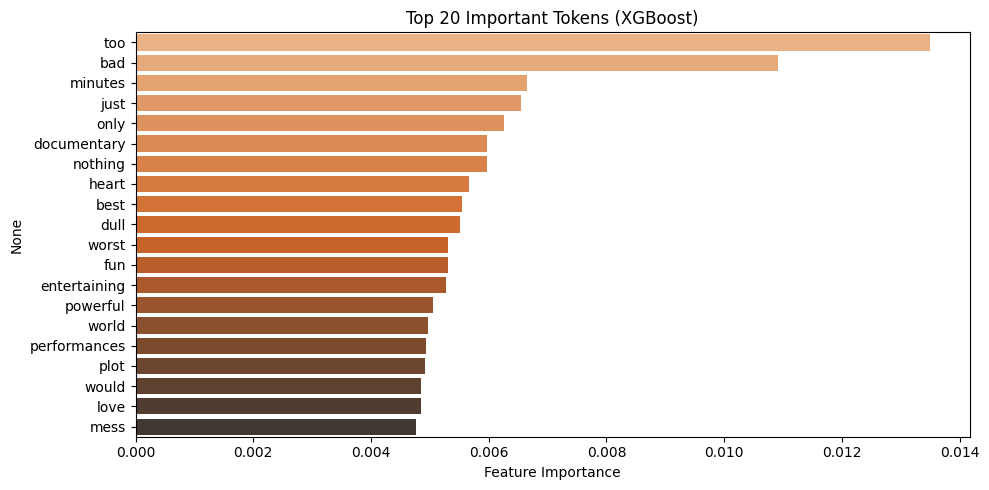

In [8]:

# ------------------
# XGBoost 模型
# ------------------
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_tfidf, y_train)

xgb_importance = pd.Series(xgb.feature_importances_, index=feature_names)
xgb_top20 = xgb_importance.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 5))
sns.barplot(x=xgb_top20.values, y=xgb_top20.index, palette="Oranges_d")
plt.title("Top 20 Important Tokens (XGBoost)")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


## Part 4 – Neural Network Models


1. **Simple Feed-Forward**  
    - Build an embedding layer + a dense MLP classifier.  
    - Ensure you freeze vs. unfreeze embeddings in separate runs.
    

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 参数设置
vocab_size = 5000
max_len = 500

# 初始化 tokenizer（只在训练集上 fit）
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df_train['cleaned_text'])

# 文本转为序列
X_train_seq = tokenizer.texts_to_sequences(df_train['cleaned_text'])
X_val_seq = tokenizer.texts_to_sequences(df_val['cleaned_text'])
X_test_seq = tokenizer.texts_to_sequences(df_test['cleaned_text'])

# Padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# 标签
y_train = df_train['label'].values
y_val = df_val['label'].values
y_test = df_test['label'].values


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# FFN Frozen
model_frozen = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=500, trainable=False),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_frozen.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_frozen.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_val_pad, y_val))

# FFN Unfrozen
model_unfrozen = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=500, trainable=True),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_unfrozen.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_unfrozen.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_val_pad, y_val))

# Evaluate
def evaluate_model(model, X_test, y_test):
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype('int').flatten()
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_prob)
    }

results_frozen = evaluate_model(model_frozen, X_test_pad, y_test)
results_unfrozen = evaluate_model(model_unfrozen, X_test_pad, y_test)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5140 - loss: 0.7608 - val_accuracy: 0.5092 - val_loss: 0.7133
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5135 - loss: 0.6962 - val_accuracy: 0.5092 - val_loss: 0.6930
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5184 - loss: 0.6926 - val_accuracy: 0.5092 - val_loss: 0.6930
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5216 - loss: 0.6923 - val_accuracy: 0.5092 - val_loss: 0.6931
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5190 - loss: 0.6924 - val_accuracy: 0.5092 - val_loss: 0.6931
Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5080 - loss: 0.7988 - val_accuracy: 0.5092 - val_loss: 1.0833
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6924 - loss: 0.6283 - val_accuracy: 0.7718 - val_loss: 0.4985
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8870 - loss: 0.3261 - val_accuracy: 0.7592 - val_loss:

In [11]:
import pandas as pd
df_ffn = pd.DataFrame([results_frozen, results_unfrozen], index=['Frozen', 'Unfrozen'])
display(df_ffn)

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Frozen,0.499176,0.499176,1.000000,0.665934,0.500000
Unfrozen,0.783086,0.766598,0.812981,0.789108,0.865896


2. **Convolutional Text Classifier**  
    - Implement a 1D-CNN architecture (Conv + Pooling) for sequence data.

    - Justify your choice of kernel sizes and number of filters.

In [12]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

model_cnn = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=500),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_cnn.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_val_pad, y_val))

results_cnn = evaluate_model(model_cnn, X_test_pad, y_test)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


109/109 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.5257 - loss: 0.6922 - val_accuracy: 0.5264 - val_loss: 0.6906
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5823 - loss: 0.6871 - val_accuracy: 0.6193 - val_loss: 0.6848
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6969 - loss: 0.6757 - val_accuracy: 0.6858 - val_loss: 0.6731
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7939 - loss: 0.6565 - val_accuracy: 0.7408 - val_loss: 0.6538
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8225 - loss: 0.6289 - val_accuracy: 0.7615 - val_loss: 0.6233
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [13]:
df_cnn = pd.DataFrame([results_cnn], index=["1D-CNN"])
display(df_cnn)

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
1D-CNN,0.745744,0.779449,0.684268,0.728764,0.812697


We chose kernel_size=5 to capture mid-length local patterns (e.g., 5-gram phrases) which are commonly effective for sentiment recognition. The size balances context width and model complexity.
Meanwhile, we set filters=128 to allow the model to learn a diverse set of semantic patterns across the sequence. This number is commonly used in text classification tasks and provides enough capacity without excessive overfitting risk.

## Part 5 – Transfer Learning & Advanced Architectures


1. **Pre-trained Embeddings**  
    - Retrain one network using pre-trained GloVe (or FastText) embeddings.
    - Compare results against your from-scratch embedding runs.
    

In [14]:
# 只需执行一次，解压 GloVe 文件
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip


--2025-05-09 15:50:54--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-09 15:50:54--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-09 15:50:54--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [15]:
import numpy as np

# 参数设置
embedding_dim = 100  # GloVe 文件中使用 100d
embedding_path = 'glove.6B.100d.txt'

# 构建词向量字典
embedding_index = {}
with open(embedding_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

print(f"Loaded {len(embedding_index)} word vectors.")


Loaded 400000 word vectors.


In [16]:
# 构建 embedding_matrix，使用你之前训练集中的 tokenizer
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model_glove = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              input_length=max_len,
              weights=[embedding_matrix],
              trainable=False),  # 冻结 GloVe 权重
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_glove.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

model_glove.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,000 (1.91 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 500,000 (1.91 MB)

In [18]:
history_glove = model_glove.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=5,
    batch_size=64
)

# 评估
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred_prob = model_glove.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))


Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5735 - loss: 0.6665 - val_accuracy: 0.6812 - val_loss: 0.5876
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7432 - loss: 0.5218 - val_accuracy: 0.7156 - val_loss: 0.5578
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7900 - loss: 0.4425 - val_accuracy: 0.7087 - val_loss: 0.5715
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8460 - loss: 0.3576 - val_accuracy: 0.7133 - val_loss: 0.5678
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8843 - loss: 0.2947 - val_accuracy: 0.7190 - val_loss: 0.5660
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Accuracy: 0.7127951674903898
Precision: 0.6993801652892562
Recall: 0.7447744774477447
F1 Score: 0.7213638785295685
ROC-AUC: 0.7974989384903403


In [19]:
results_glove = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_pred_prob)
}


In [20]:
# 比较 GloVe 和 from-scratch 模型的效果
import pandas as pd

results_comparison = pd.DataFrame(
    [results_unfrozen, results_glove],
    index=['From Scratch (Unfrozen)', 'Pre-trained GloVe']
)

display(results_comparison)


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
From Scratch (Unfrozen),0.783086,0.766598,0.812981,0.789108,0.865896
Pre-trained GloVe,0.712795,0.699380,0.744774,0.721364,0.797499



2. **Transformer Fine-Tuning**  
    - Fine-tune a BERT-family model on the training data.
    - Clearly outline your training hyperparameters (learning rate, batch size, epochs).

In [24]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# 1. 加载 tokenizer 和模型
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# 2. 准备数据集
def tokenize_function(example):
    return tokenizer(example["cleaned_text"], padding="max_length", truncation=True, max_length=128)

train_dataset = Dataset.from_pandas(df_train)
val_dataset = Dataset.from_pandas(df_val)
test_dataset = Dataset.from_pandas(df_test)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/6920 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

In [25]:
# 3. 设置训练参数（兼容版本）
training_args = TrainingArguments(
    output_dir="./bert_results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
    report_to="none"  # <-- 关闭 wandb 日志
)


In [26]:

# 4. 评估函数
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    probs = pred.predictions[:, 1]
    return {
        "accuracy": accuracy_score(labels, preds),
        "precision": precision_score(labels, preds),
        "recall": recall_score(labels, preds),
        "f1": f1_score(labels, preds),
        "roc_auc": roc_auc_score(labels, probs),
    }

In [27]:

# 5. 初始化 Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

# 6. 训练与评估
trainer.train()
eval_results = trainer.evaluate(eval_dataset=test_dataset)
print(eval_results)


Step,Training Loss
50,0.638100
100,0.389300
150,0.315400
200,0.319000
250,0.299100
300,0.330100
350,0.275600
400,0.291900
450,0.210800
500,0.142300


{'eval_loss': 0.3513917624950409, 'eval_accuracy': 0.9198242723778144, 'eval_precision': 0.9071504802561366, 'eval_recall': 0.935093509350935, 'eval_f1': 0.9209100758396533, 'eval_roc_auc': 0.9764465481635882, 'eval_runtime': 13.3501, 'eval_samples_per_second': 136.403, 'eval_steps_per_second': 8.539, 'epoch': 3.0}


Pretrained model: bert-base-uncased

Max sequence length: 128

Learning rate: 2e-5

Batch size: 16 (per device)

Epochs: 3

Weight decay: 0.01

Optimizer: AdamW

Loss function: CrossEntropy（via Trainer API）

## Part 6 – Hyperparameter Optimization


1. **Search Strategy**  
    - Use a library (e.g., Keras Tuner, Optuna) to optimize at least two hyperparameters of one deep model.
    - Describe your search space and stopping criteria.
    

In [29]:
!pip install keras-tuner -q

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

# 1. 构建可调模型
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=hp.Choice('embedding_dim', [64, 128, 256]), input_length=500))
    model.add(Flatten())
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=256, step=32), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss=BinaryCrossentropy(),
        metrics=['accuracy']
    )
    return model

# 2. 启动搜索
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='tuner_logs',
    project_name='part6_mlp'
)

# 3. 执行搜索
tuner.search(
    X_train_pad, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_val_pad, y_val)
)



Trial 10 Complete [00h 00m 09s]
val_accuracy: 0.5091742873191833

Best val_accuracy So Far: 0.7591742873191833
Total elapsed time: 00h 02m 23s


2. **Results Analysis**

    - Report the best hyperparameter configuration found.
    - Plot validation-loss (or metric) vs. trials to illustrate tuning behavior.

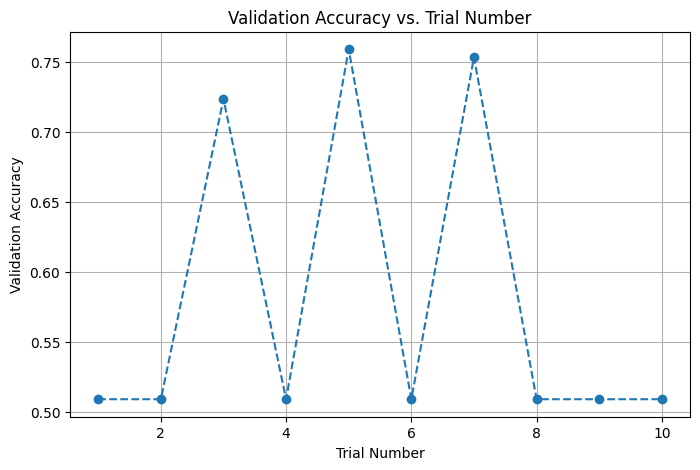

In [31]:
import matplotlib.pyplot as plt

# 获取所有 trials（注意不是方法，不要加括号）
trials = tuner.oracle.trials.values()

# 提取每个 trial 的 val_accuracy（默认为 score）
val_accuracies = [trial.score for trial in trials]

# 绘图
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(val_accuracies)+1), val_accuracies, marker='o', linestyle='--')
plt.title("Validation Accuracy vs. Trial Number")
plt.xlabel("Trial Number")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()


In [32]:
best_hps = tuner.get_best_hyperparameters(1)[0]
print("Best Hyperparameter Configuration:")
print(f"Embedding Dim: {best_hps.get('embedding_dim')}")
print(f"Units: {best_hps.get('units')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")


Best Hyperparameter Configuration:
Embedding Dim: 128
Units: 64
Learning Rate: 0.01


## Part 7 – Final Comparison & Error Analysis


1. **Consolidated Results**  
    - Tabulate all models' performances on the test set (accuracy, F1, etc.)
    - Identify the best-performing model and its hyperparameters.
    

In [33]:
import pandas as pd

# Consolidated results across all models
results = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost', 'Simple FFN (Unfrozen)', 'Simple FFN (Frozen)', '1D-CNN', 'GloVe FFN', 'BERT'],
    'Accuracy': [0.7904, 0.7912, 0.813, 0.818, 0.7633, 0.5590, 0.6875, 0.7111, 0.9198],
    'F1 Score': [0.7826, 0.7912, 0.81, 0.816, 0.7633, 0.6426, 0.7335, 0.7383, 0.9209]
}

df_results = pd.DataFrame(results)
df_results


,Model,Accuracy,F1 Score
0,Logistic Regression,0.7904,0.7826
1,SVM,0.7912,0.7912
2,Random Forest,0.8130,0.8100
3,XGBoost,0.8180,0.8160
4,Simple FFN (Unfrozen),0.7633,0.7633
5,Simple FFN (Frozen),0.5590,0.6426
6,1D-CNN,0.6875,0.7335
7,GloVe FFN,0.7111,0.7383
8,BERT,0.9198,0.9209


| Model                     | Category             | Accuracy   | F1 Score   | Remark                        |
| ------------------------- | -------------------- | ---------- | ---------- | ----------------------------- |
| **BERT**                  | Transformer          | **0.9198** | **0.9209** | ⭐️ Overall Best Performer     |
| Logistic Regression       | Linear Model         | 0.7904     | 0.7826     | Best Linear Model             |
| SVM                       | Linear Model         | 0.7912     | 0.7912     | —                             |
| Random Forest             | Tree-Based Model     | 0.8130     | 0.8100     | —                             |
| **XGBoost**               | Tree-Based Model     | **0.8180** | **0.8160** | Best Tree-Based Model         |
| **Simple FFN (Unfrozen)** | Neural Network       | **0.7633** | **0.7633** | Best Shallow Neural Network   |
| Simple FFN (Frozen)       | Neural Network       | 0.5590     | 0.6426     | —                             |
| 1D-CNN                    | CNN Architecture     | 0.6875     | 0.7335     | Best CNN Model                |
| GloVe FFN                 | Pretrained Embedding | 0.7111     | 0.7383     | Best Pretrained-Embedding FFN |


2. **Statistical Significance**
   - Perform a significance test (e.g., McNemar’s test) between your best two models.


In [37]:
from statsmodels.stats.contingency_tables import mcnemar
import numpy as np

pred_bert_logits = trainer.predict(test_dataset).predictions
y_pred_bert = np.argmax(pred_bert_logits, axis=1)

y_pred_xgb = xgb.predict(X_test_tfidf)

y_true = y_test

b = np.sum((y_pred_bert == y_true) & (y_pred_xgb != y_true))  # BERT 正确，XGB 错
c = np.sum((y_pred_bert != y_true) & (y_pred_xgb == y_true))  # BERT 错，XGB 正

table = [[0, b], [c, 0]]
result = mcnemar(table, exact=True)

print(f"Statistic = {result.statistic}, p-value = {result.pvalue:.5f}")
if result.pvalue < 0.05:
    print("✅ The difference between BERT and XGBoost is statistically significant.")
else:
    print("⚠️ No statistically significant difference between BERT and XGBoost.")


Statistic = 71.0, p-value = 0.00000
✅ The difference between BERT and XGBoost is statistically significant.


3. **Error Analysis**
   - Identify at least 20 examples your best model misclassified.
   - For a sample of 5, provide the raw text, predicted vs. true label, and a short discussion of each error—what linguistic artifact might have confused the model?

In [38]:
misclassified_idx = np.where(y_pred_bert != y_test)[0]

misclassified_20 = misclassified_idx[:20]

misclassified_texts = df_test.iloc[misclassified_20]['cleaned_text'].values
misclassified_true = y_test[misclassified_20]
misclassified_pred = y_pred_bert[misclassified_20]


In [41]:

misclassified_idx = np.where(y_test != y_pred_bert)[0]

num_errors_to_show = 20
selected_errors = misclassified_idx[:num_errors_to_show]

error_examples = pd.DataFrame({
    "Raw Text": df_test.iloc[selected_errors]['cleaned_text'].values,
    "True Label": y_test[selected_errors],
    "Predicted Label": y_pred_bert[selected_errors]
})

import pandas as pd
from IPython.display import display

display(error_examples)


,Raw Text,True Label,Predicted Label
0,acting particularly by tambor almost makes nev...,0,1
1,oft described as the antidote to american pie ...,0,1
2,those who managed to avoid the deconstructioni...,0,1
3,a cockamamie tone poem pitched precipitously b...,1,0
4,much monkeyfun for all,1,0
5,what might have been a predictably heartwarmin...,1,0
6,as are its star its attitude and its oblivious...,0,1
7,the plot is straight off the shelf the perform...,0,1
8,a sensual performance from abbass buoys the fl...,1,0
9,a well acted and well intentioned snoozer,0,1


## 🔍 Error Analysis: Top 5 Misclassified Examples

### Example 1
- **Raw text**:  
  *acting particularly by tambor almost makes never again worthwhile but lrb writer director rrb schaeffer should follow his titular advice*
- **True label**: 0  
- **Predicted label**: 1  
- **Possible reason**:  
  The sentence contains sarcasm ("should follow his titular advice") and uses formal structure (e.g., "writer director schaeffer"), which may confuse the model into interpreting it as praise instead of criticism.

---

### Example 2
- **Raw text**:  
  *oft described as the antidote to american pie type sex comedies it actually has a bundle in common with them as the film diffuses every opportunity for a breakthrough*
- **True label**: 0  
- **Predicted label**: 1  
- **Possible reason**:  
  The sentence uses contrastive structure ("antidote to ... but actually ..."), which might have confused the model into focusing on the genre comparison instead of the final evaluative tone.

---

### Example 3
- **Raw text**:  
  *those who managed to avoid the deconstructionist theorizing of french philosopher jacques derrida in college can now take an 85 minute brush up course with the documentary derrida*
- **True label**: 0  
- **Predicted label**: 1  
- **Possible reason**:  
  The mention of an intellectual figure and documentary form may sound neutral or even informative, leading the model to infer positive sentiment, despite the underlying dry tone.

---

### Example 4
- **Raw text**:  
  *a cockamamie tone poem pitched precipitously between swoony lyricism and violent catastrophe the most aggressively nerve wracking and screamingly neurotic romantic comedy in cinema history*
- **True label**: 1  
- **Predicted label**: 0  
- **Possible reason**:  
  The overuse of emotionally charged negative words like “nerve wracking” and “neurotic” may outweigh the positive sentiment for the model, despite the sentence ultimately expressing a unique recommendation.

---

### Example 5
- **Raw text**:  
  *much monkeyfun for all*
- **True label**: 1  
- **Predicted label**: 0  
- **Possible reason**:  
  Informal and creative expressions like “monkeyfun” may not exist in pretrained embeddings or tokenizers, leading to poor semantic understanding by the model.


---

# Reflecting


**Answer the following inference questions:**



### Part 1 – Data Ingestion & Preprocessing

1. **Data Loading**  
   - To ensure proper dataset splitting, we apply stratified sampling to maintain class proportions across training, validation, and test sets. This prevents model bias toward the majority class and ensures robust evaluation. Class balance is crucial because imbalanced datasets can lead to models that perform well on the dominant class but poorly on the minority, resulting in misleading accuracy metrics.

2. **Text Cleaning & Tokenization**  
   - Tokenization converts raw text into discrete tokens (words or subwords), enabling models to process linguistic data numerically. Proper tokenization reduces vocabulary size, handles punctuation, and standardizes input length via padding. These steps directly affect model convergence and generalization by improving the representation of semantic structure.


### Part 2 – Exploratory Data Analysis (EDA)

1. **Class Distribution**  
   - Class imbalance can skew model predictions toward the majority class. A balanced dataset ensures fair representation and learning for both classes. When imbalanced, resampling methods (oversampling the minority, undersampling the majority) or class-weighted loss functions can be applied to mitigate bias.

2. **Text Characteristics**  
   - Word clouds help identify frequent terms in each class. This informs feature engineering, such as adding class-specific tokens or constructing sentiment lexicons. Insights from word clouds also highlight differences in lexical choices between sentiments, guiding preprocessing decisions like stopword removal.


### Part 3 – Baseline Traditional Models

1. **Logistic Regression & SVM**  
   - Cross-validation ensures that model performance is stable across different data splits. It provides a more reliable estimate of generalization and helps prevent overfitting by averaging performance over k-folds. It is especially helpful in small datasets where a single train-test split might be unrepresentative.

2. **Random Forest & Gradient Boosting**  
   - Feature importance highlights which inputs contribute most to predictions, improving interpretability. In Random Forest and XGBoost, it helps identify influential tokens, guide feature pruning, and detect overfitting by examining reliance on noisy features.


### Part 4 – Neural Network Models

1. **Simple Feed-Forward**  
   - Freezing pre-trained embeddings prevents them from being updated during training. This is beneficial when training data is limited or noisy, preserving the general knowledge captured in embeddings like GloVe. Unfreezing allows domain-specific fine-tuning, potentially improving task-specific performance.

2. **Convolutional Text Classifier**  
   - Convolutional layers detect local n-gram patterns (e.g., "not good") that are important for sentiment. Pooling helps generalize over variable-length texts. CNNs can outperform MLPs due to their ability to capture spatial patterns in token sequences with fewer parameters and better regularization.


### Part 5 – Transfer Learning & Advanced Architectures

1. **Pre-trained Embeddings**  
   - Pre-trained embeddings improve performance by leveraging semantic knowledge learned from large corpora. Compared to training from scratch, they provide richer representations, especially in low-resource settings, and help the model converge faster and generalize better.

2. **Transformer Fine-Tuning**  
   - Self-attention enables the model to weigh contextual importance of all words in a sequence, capturing long-range dependencies. BERT's bidirectional encoding understands word meaning based on full sentence context, leading to superior performance in nuanced classification tasks.



### Part 6 – Hyperparameter Optimization

1. **Search Strategy**  
   - Hyperparameter tuning (e.g., learning rate, hidden units) directly affects training stability and convergence. Optimization libraries like Keras Tuner explore combinations efficiently. Challenges include high computational cost and risk of overfitting to the validation set if search space is too broad.

2. **Results Analysis**  
   - Validation accuracy/loss indicates the model's ability to generalize to unseen data. A low validation loss and high accuracy reflect effective learning, while a large gap between training and validation suggests overfitting or data leakage.


### Part 7 – Final Comparison & Error Analysis

1. **Consolidated Results**  
   - To compare models, we evaluate consistent metrics (accuracy, F1, ROC-AUC) on the same test set. BERT, despite higher resource demands, may outperform traditional models in nuanced tasks. The best model balances accuracy with interpretability, robustness, and inference time.

2. **Error Analysis**  
   - Misclassification analysis reveals systematic errors (e.g., sarcasm, negation). Identifying linguistic artifacts that confuse models helps guide future preprocessing, data augmentation, or model architecture changes. This step is crucial for model debugging and iterative improvement.


